# Lecture 7
- Continuous Random Variables

## Midterm course evaluations by logging into the below listed website (not Canvas):

 

https://ufl.bluera.com/ufl/



- Please complete as soon as possible
- Gives me an opportunity to incorporate valuable feedback before the end of the semester!


In [17]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

# Introduction to Continuous RVs

## Uniform Continuous RVs

* A Uniform RV models continuous-valued instances that are equally likely to occur in a given interval $[a,b]$.

$$X \sim \text{Uniform}(a,b) \text{ or }$$

For short, 

$$X \sim U(a,b) $$

* The **probability density function (PDF)** of the Uniform random variable is:

$$f_X(x) = \begin{cases}\frac{1}{b-a} & x\in [a,b]\\ 0 & \text{o.w.}\end{cases}$$

* The **cumulative distribution function (CDF)** of this Uniform random variable is:

$$F_X(x) = \begin{cases} 0 & x<a \\ \frac{x-a}{b-a} & x\in [a,b]\\ 1 & x>b \end{cases}$$

Previously, we introduced a way to choose random values from the interval $[0,1)$:

In [18]:
npr.random(size=10)

array([0.73762959, 0.80021421, 0.4493261 , 0.8562549 , 0.20010923,
       0.44184681, 0.10190337, 0.8707662 , 0.35033626, 0.34247234])

We could also use scipy.stats for this:


In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.


In [19]:
?stats.uniform

Signature:       stats.uniform(*args, **kwds)
Type:            uniform_gen
String form:     <scipy.stats._continuous_distns.uniform_gen object at 0x7ff5d03432e0>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A uniform continuous random variable.

In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.

As an instance of the `rv_continuous` class, `uniform` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale

In [20]:
U = stats.uniform(loc=0, scale =2) # uniform [0, 2]

* Let's find $F_U(0.2)=P(U \le u)$ for $u=0.2$:

In [21]:
u = 0.2
U.cdf(u)

0.1

* Let's find $P(0.25 < U \le 0.75)$:

In [22]:
# 
p = U.cdf(0.75) - U.cdf(0.25)
print(p)

0.25


* Let's find $P(0.45 < U \le 0.55)$:

In [23]:
 U.cdf(0.55) - U.cdf(0.45)

0.05000000000000002

Note that since $F_U(u)=u$, then $F_U(b)-F_U(a)=b-a$.

**This random variable has no probability at any of the values it takes on! So, the PMF is *meaningless* for continuous RVs. **

* This video from 3Blue1Brown provides another view of this: ["Why *probability of 0* does not mean *impossible*"](https://www.youtube.com/watch?v=ZA4JkHKZM50)

___

## Exponential RV

**Used to model:** Lifetime of an electrical device, service time or time between arrivals in a queue, distance between mutations on a DNA strand, monthly and annual maximum values of daily rainfall.

* Obtainable as a limit of Geometric random variables.

* $X$ is an exponential RV and write it as: 

$$X\sim \text{Exponential}(\lambda )$$

* The **probability density function (PDF)** is given as:

$$ f_X(x) = \begin{cases} \lambda e^{-\lambda x}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

or, using the $\mu=1/\lambda$ notation,

$$ f_X(x) = \begin{cases} \frac{1}{\mu} e^{-x/\mu}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

We will use the first form because it is more common and simpler.

* The CDF is given as:

\begin{align*}
F_X(x) &= \int_{-\infty}^{x} f_X(u) du\\ 
&= \begin{cases}\int_0^{x} \lambda e^{-\lambda u}du & x\geq 0 \\ 0 & x<0 \end{cases}\\
&= \begin{cases} 1-e^{-\lambda x} & x\geq 0 \\ 0 & x<0 \end{cases}\\
\end{align*}

In [24]:
?stats.expon

Signature:       stats.expon(*args, **kwds)
Type:            expon_gen
String form:     <scipy.stats._continuous_distns.expon_gen object at 0x7ff5e839b850>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
An exponential continuous random variable.

As an instance of the `rv_continuous` class, `expon` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, lo

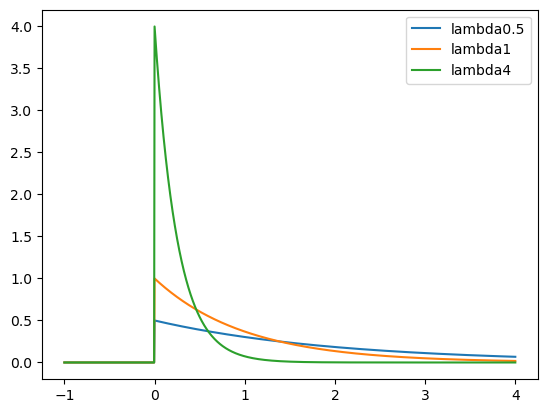

In [25]:
## Note that lambda is a keyword (private) in Python, so we should not
# use it as a variable name

z = np.linspace(-1,4,1001)

for lam in [0.5,1,4]:
    Z = stats.expon(scale = 1/lam)
    plt.plot(z, Z.pdf(z), label ='lambda'+str(lam))

plt.legend()

___

# Gaussian Random Variable


The density function for a Gaussian random variable has a somewhat complicated form:

$$f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\},$$

with parameters $\mu$ and $\sigma^2 \ge 0$. 

* The parameter $\mu$ is called the **mean** of the Gaussian distribution.
* The parameter $\sigma^2$ is called the **variance** of the Gaussian distribution.
* The parameter $\sigma$ is called the **standard deviation** of the Gaussian distribution.

* We say that $X$ is a Gaussian RV and write it as: 

$$X\sim \mathcal{N}(\mu,\sigma^2)$$

The CDF of a Gaussian RV is given by

\begin{align*}
F_X(x) &= P(X \leq x) \\
&= \int_{-\infty}^x \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left\{-\frac{(t-\mu)^2}{2\sigma^2}\right\}} dt
\end{align*}

which **cannot be evaluated in closed form**, use numerical method to evaluate.

In [26]:
?stats.norm

Signature:       stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7ff5f1307100>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale

In [27]:
# Normal aka G(0,1)
G1 = stats.norm(loc=0, scale =1)
# Gaussian(10,variance=3) % variance = sigma^2
G2 = stats.norm(loc =10, scale = np.sqrt(3))
# Gaussian(-5,0.3)
G3 = stats.norm(loc= -5, scale = np.sqrt(0.3))

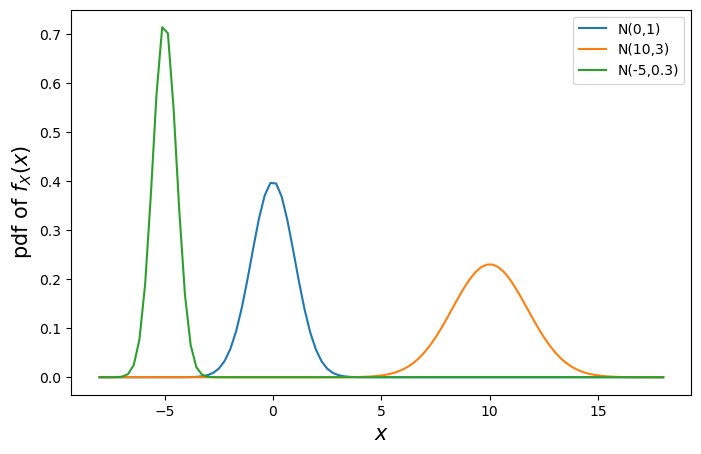

In [28]:
plt.figure(figsize=(8,5))
x = np.linspace(-8,18,100)
plt.plot(x, G1.pdf(x) ,label='N(0,1)')
plt.plot(x, G2.pdf(x) ,label='N(10,3)')
plt.plot(x, G3.pdf(x) ,label='N(-5,0.3)')
plt.legend()
plt.xlabel('$x$', size = 15)
plt.ylabel('pdf of $f_X(x)$', size = 15);


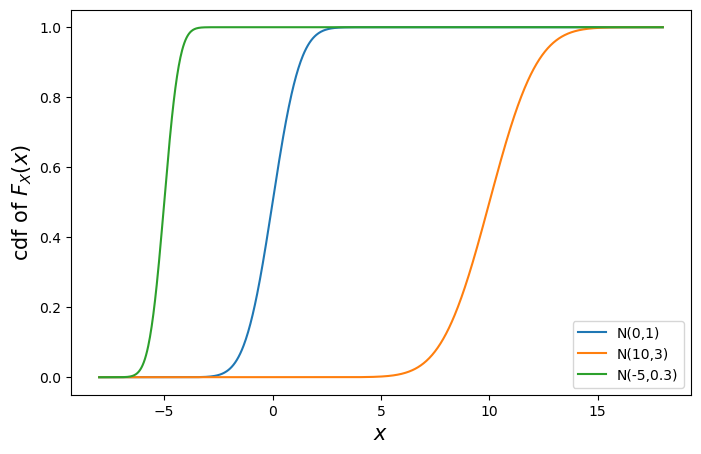

In [29]:
plt.figure(figsize=(8,5))
x = np.linspace(-8,18,1000)
plt.plot(x,G1.cdf(x)  ,label='N(0,1)')
plt.plot(x, G2.cdf(x)  ,label='N(10,3)')
plt.plot(x,  G3.cdf(x) ,label='N(-5,0.3)')
plt.legend()
plt.xlabel('$x$', size = 15)
plt.ylabel('cdf of $F_X(x)$', size = 15);


# Properties of Gaussian RV. 

## 1. Additivity of Gaussians

If  $X \sim N(\mu_1, \sigma_1^2)$  and $ Y \sim N(\mu_2, \sigma_2^2)$  are independent, then:

$$X + Y \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$$



## 2. Affine Transformations

If  $X \sim N(\mu, \sigma^2)$ , then for any **constants**  $a$  and $ b$ :

$$Y = aX + b \sim N(a\mu + b, a^2\sigma^2)$$


Generalization,  $X \sim N(\mu_1, \sigma_1^2)$  and $ Y \sim N(\mu_2, \sigma_2^2)$  are independent, then given two constants $a$ and $b$

$$a X + b Y \sim $$

## Normalization

A Gaussian RV $X \sim N (\mu, \sigma^2)$ can be normalized to 

$$
Y = \frac{X - \mu}{\sigma}
$$


it can be shown that $Y \sim N(0,1)$ --- A **STANDARD** normal RV.

## 68-95-99.7 rule.

One-standard deviation from the mean:  A range of data where   68\% of the data fall into.

Two-standard deviation from the mean:  A range of data where   95\% of the data fall into.

Three-standard deviation from the mean:  A range of data where   99.7 \% of the data fall into.

# Example with Gaussian RV. 

Two swimmers, A and B, have their past performances evaluated based on their scores for 100 breaststroke, which are found to follow Gaussian distributions:

- Player A’s scores follow  $X_A \sim N(\mu_A, \sigma_A^2)$ with $\mu_A =59.8 $, and $\sigma_A = 1$.
- Player B’s scores follow  $X_B \sim N(\mu_B, \sigma_B^2)$  with $\mu_B=57.2 $ and $\sigma_B =3$. 

1. What is the probability that player A scores higher than player B in one race?


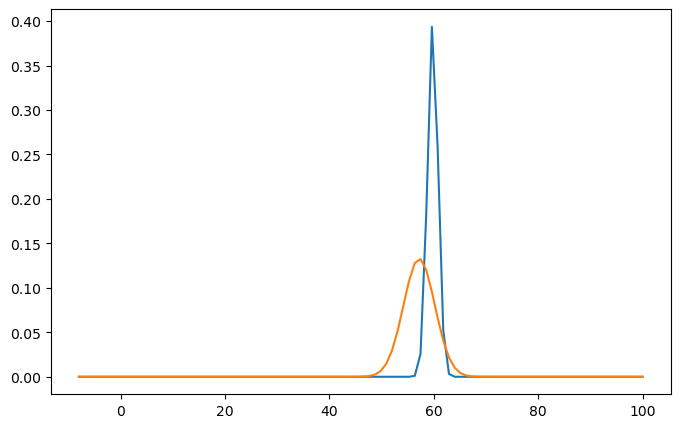

In [32]:
locA = 59.8
scaleA = 1
locB = 57.2
scaleB = 3

GA = stats.norm(loc = locA, scale = scaleA)
GB = stats.norm(loc = locB, scale = scaleB)

plt.figure(figsize=(8,5))
x = np.linspace(-8,100,100)
plt.plot(x, GA.pdf(x) ,label='player A')
plt.plot(x, GB.pdf(x) ,label='player B')

0.7945162389558313

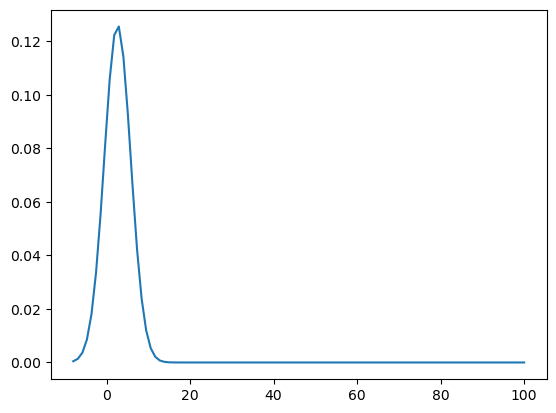

In [34]:
Gdiff = stats.norm(loc = locA -locB, scale= np.sqrt(scaleA**2 + scaleB**2))
x = np.linspace(-8,100,100)
plt.plot(x, Gdiff.pdf(x) ,label='player A - player B')
Gdiff.sf(0)

2. If the two players, each swim three times, a player is the winner if his/her sum of scores is strictly greater than the other players. What is the probability that player A is the winner?  

In [37]:
pwin =Gdiff.sf(0)
Bw =stats.binom(3, pwin)
PAwin = Bw.sf(2)
PAwin

0.5015431858139895

2. If the two players, each swim 10 times, a player is the winner if his/her sum of scores is strictly greater than the other players. What is the probability that player A is the winner? 

In [38]:
pwin =Gdiff.sf(0)
Bw =stats.binom(10, pwin)
PAwin2 = Bw.sf(6)
PAwin2

0.8692686397601077

In [40]:
G0= stats.norm()

# todo: compute the one standard deviation from the mean
G0.cdf(1) - G0.cdf(-1)

0.6826894921370859

In [41]:
# todo: compute the two standard deviation from the mean
G0.cdf(2) - G0.cdf(-2)

0.9544997361036416

In [42]:
# todo: compute the three standard deviation from the mean
G0.cdf(3) - G0.cdf(-3)

0.9973002039367398

In [44]:
?stats.norm

Signature:       stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7ff5f1307100>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale

## Additional reading: truncated Gaussian

A truncated Gaussian distribution is a normal distribution that is restricted to a finite range $[a, b]$. Instead of allowing values from $-\infty$ to $+\infty$, the distribution is truncated at specific bounds.

If a normal random variable  $X \sim N(\mu, \sigma^2)$  is truncated to the interval  $[a, b]$ , then its probability density function (PDF) is given by:


$$f(x) = \frac{\frac{1}{\sigma} \phi\left(\frac{x - \mu}{\sigma}\right)}{\Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)}
$$

where:
* $\phi(x) $  is the standard normal PDF:

$$\phi(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$$

* $\Phi(x)$  is the standard normal CDF:

$$\Phi(x) = \int_{-\infty}^{x} \phi(t) dt$$

 The denominator ensures the total probability sums to 1 (since part of the Gaussian is removed).